In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.feature_selection import f_classif
import seaborn as sns
from statsmodels.stats.multitest import multipletests

In [50]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc, plot_roc_curve

In [3]:
# load data file
data = pd.read_csv('data_processed.csv')
data

,PATH_N_STAGE,M_CTNNAL1,M_C16ORF91,M_PRSS27,M_HIST1H3J,M_OAS1,M_CKS1B,M_MAP6D1,M_LOC100129935,M_GABPB2,...,M_HLA-DPB1,M_HPDL,M_ZC3H11A,M_TESPA1,M_RAB39A,M_ATG16L1,M_RNF135,M_CAPN14,M_RABL2A,M_ASB13
0,2.0,-0.7253,-0.0768,-0.0967,-0.6287,-0.1719,-0.5324,-0.0323,-0.0489,-0.5993,...,-0.7532,4.1173,0.3612,-0.7000,-0.4913,-0.0141,-0.1810,-0.3636,0.0976,-1.3205
1,2.0,0.3567,-0.7217,-0.2737,0.0056,-0.6596,-0.7607,-0.7301,-0.0489,-0.7948,...,-0.8281,0.2793,0.1532,-0.5564,-0.2891,-0.4861,-0.0159,0.8203,0.4123,0.3274
2,2.0,-1.6328,-1.2149,-0.6054,0.3899,-0.1846,-0.8369,-0.5067,-0.0489,-2.0156,...,-1.1604,0.8328,-1.1808,-0.6206,0.0872,0.1618,1.3626,-0.1659,0.8552,0.2087
3,2.0,0.5051,0.2343,-0.5626,0.9624,-0.5755,-0.2063,0.7426,-0.0489,0.8774,...,-0.6370,-0.4139,0.7234,-0.6513,-0.1241,0.8600,-0.1750,-0.6490,-1.0373,0.2868
4,2.0,1.6196,0.3325,-0.4805,-0.6287,-0.5363,0.0658,-0.6350,-0.0489,0.4251,...,-0.5394,-0.2538,0.5924,-0.4398,-0.4335,-1.9213,-0.3402,-0.7131,-0.6063,0.4258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1.0,-0.0506,-0.2335,0.3169,-0.0826,-0.2698,0.8429,0.2255,-0.0489,3.2326,...,2.2672,0.3750,-0.5360,3.5292,-0.2015,-0.6994,0.9662,-0.0530,0.1612,-1.1149
413,1.0,0.5306,0.0369,-0.5095,0.5126,-0.4321,0.0187,0.6411,-0.0489,1.1949,...,0.6081,-0.0431,0.2345,0.9109,0.0642,0.7365,0.3810,-0.3108,1.0893,0.5753
414,1.0,3.3271,1.7487,-0.3745,0.5228,-0.1579,1.6761,4.1996,-0.0489,4.4300,...,1.0021,-0.3415,1.4632,1.1339,0.3670,-0.3613,-0.6580,0.6786,1.1767,-0.6225
415,1.0,-1.1593,0.1446,4.7902,0.0459,1.8775,0.7112,-0.4126,-0.0489,0.9277,...,3.6217,-0.4544,1.8294,4.3256,0.0244,-0.2576,1.2125,0.5778,1.2353,-0.6806


In [4]:
label = data['PATH_N_STAGE']

### Run ANOVA F value again

This move recalculate ANOVA F-value for all features so that the order of the features to include in the model best reflect difference between groups instead of within group.

In [5]:
f_values, p_values = f_classif(data.iloc[:,1:],data['PATH_N_STAGE'])
f_pd = pd.DataFrame(f_values, columns = ['F-value'])

In [6]:
# create a new dataframe with the feature names and F-values
fnf = pd.DataFrame({'feature': data.iloc[:,1:].columns, 'F-value': f_values})

# sort the dataframe in descending order based on the F-values
sorted_fnf = fnf.sort_values('F-value', ascending=False)

columns = sorted_fnf['feature']

selected = data[columns]
data = selected
data["PATH_N_STAGE"] = label
data

,M_CTNNAL1,M_C16ORF91,M_PRSS27,M_HIST1H3J,M_LOC100129935,M_OAS1,M_CKS1B,M_MAP6D1,M_GABPB2,M_ORAOV1,...,M_HPDL,M_ZC3H11A,M_TESPA1,M_RAB39A,M_ATG16L1,M_RNF135,M_CAPN14,M_RABL2A,M_ASB13,PATH_N_STAGE
0,-0.7253,-0.0768,-0.0967,-0.6287,-0.0489,-0.1719,-0.5324,-0.0323,-0.5993,0.3610,...,4.1173,0.3612,-0.7000,-0.4913,-0.0141,-0.1810,-0.3636,0.0976,-1.3205,2.0
1,0.3567,-0.7217,-0.2737,0.0056,-0.0489,-0.6596,-0.7607,-0.7301,-0.7948,0.7673,...,0.2793,0.1532,-0.5564,-0.2891,-0.4861,-0.0159,0.8203,0.4123,0.3274,2.0
2,-1.6328,-1.2149,-0.6054,0.3899,-0.0489,-0.1846,-0.8369,-0.5067,-2.0156,1.4777,...,0.8328,-1.1808,-0.6206,0.0872,0.1618,1.3626,-0.1659,0.8552,0.2087,2.0
3,0.5051,0.2343,-0.5626,0.9624,-0.0489,-0.5755,-0.2063,0.7426,0.8774,0.1109,...,-0.4139,0.7234,-0.6513,-0.1241,0.8600,-0.1750,-0.6490,-1.0373,0.2868,2.0
4,1.6196,0.3325,-0.4805,-0.6287,-0.0489,-0.5363,0.0658,-0.6350,0.4251,-0.0470,...,-0.2538,0.5924,-0.4398,-0.4335,-1.9213,-0.3402,-0.7131,-0.6063,0.4258,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,-0.0506,-0.2335,0.3169,-0.0826,-0.0489,-0.2698,0.8429,0.2255,3.2326,2.8767,...,0.3750,-0.5360,3.5292,-0.2015,-0.6994,0.9662,-0.0530,0.1612,-1.1149,1.0
413,0.5306,0.0369,-0.5095,0.5126,-0.0489,-0.4321,0.0187,0.6411,1.1949,0.0548,...,-0.0431,0.2345,0.9109,0.0642,0.7365,0.3810,-0.3108,1.0893,0.5753,1.0
414,3.3271,1.7487,-0.3745,0.5228,-0.0489,-0.1579,1.6761,4.1996,4.4300,1.9702,...,-0.3415,1.4632,1.1339,0.3670,-0.3613,-0.6580,0.6786,1.1767,-0.6225,1.0
415,-1.1593,0.1446,4.7902,0.0459,-0.0489,1.8775,0.7112,-0.4126,0.9277,-0.1847,...,-0.4544,1.8294,4.3256,0.0244,-0.2576,1.2125,0.5778,1.2353,-0.6806,1.0


### Split data into train set and test set

In [7]:
# Split the data into 80%/20%
data_train, data_test = train_test_split(data, test_size = 0.2, random_state=42)
data_train = data_train.reset_index(drop = True)
data_test = data_test.reset_index(drop = True)

In [8]:
X = data_train.iloc[:,:data.shape[1]-1]
y = data_train['PATH_N_STAGE']

In [9]:
gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()

In [10]:
# making predictions on the testing set
y_pred = cross_val_predict(gnb, X, y, cv=5)
y_pred

array([2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 1., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1.,
       2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2.,
       2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 1., 2., 2., 1., 2., 2.,
       2., 1., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
       1., 2., 1., 2., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2., 2., 1., 2.,
       2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 1., 2., 1.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 1., 1., 2.,
       2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [11]:
# comparing actual response values (y) with predicted response values (y_pred) using cross validation
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y, y_pred)*100)
print("Gaussian Naive Bayes model MCC:", matthews_corrcoef(y, y_pred))

Gaussian Naive Bayes model accuracy(in %): 80.18018018018019
Gaussian Naive Bayes model MCC: 0.3608087157172645


### sort the f value again

In [12]:
f_values, p_values = f_classif(X,y)
f_pd = pd.DataFrame(f_values, columns = ['F-value'])

In [13]:
# create a new dataframe with the feature names and F-values
fnf = pd.DataFrame({'feature': X.columns, 'F-value': f_values})

# sort the dataframe in descending order based on the F-values
sorted_fnf = fnf.sort_values('F-value', ascending=False)

columns = sorted_fnf['feature']

selected = X[columns]
X = selected
X

,M_C16ORF91,M_CTNNAL1,M_MAP6D1,M_HIST1H2AK,M_ASH1L-AS1,M_HIST1H3J,M_SPATA46,M_GOLGA1,M_PRSS27,M_HIST1H2BN,...,M_RAD9A,M_RPA4,M_BBC3,M_HOTAIR,M_DUX4L6,M_KISS1R,M_KCNJ9,M_PIGL,M_LOC100129935,M_OR10G9
0,0.8792,-0.0361,-0.3510,-0.3868,0.0693,-0.2442,-0.6439,0.8551,0.1356,1.2886,...,0.4958,-0.2268,-0.2790,-0.1641,5.0093,-0.1309,3.4446,0.3162,-0.0489,-0.0504
1,1.1363,-0.2450,-0.2738,-0.1765,0.3303,0.3021,0.2213,0.1103,-0.0034,-0.7416,...,-0.4151,-0.1522,1.4193,2.6129,-0.1881,-0.2389,1.4233,-0.0742,-0.0489,-0.0504
2,-0.7364,-0.3339,-1.1468,-0.1550,0.1437,-0.6287,-0.6439,-0.7200,-0.2643,-0.3989,...,-0.2748,-0.1527,0.1968,-0.3996,-0.1881,-0.1954,-0.7553,-0.1914,-0.0489,-0.0504
3,-0.9999,-1.2376,-0.4907,-0.2636,-0.2875,-0.6287,3.5319,0.7420,0.0393,-1.5120,...,-0.3144,-0.5817,-0.6945,0.3986,-0.1881,-0.2389,0.7469,0.5225,-0.0489,-0.0504
4,2.6742,-0.2704,-0.6972,-0.7952,-0.2508,-0.6287,-0.6439,-0.4717,-0.6117,-0.6322,...,0.9930,0.0924,-0.6307,1.0482,-0.1881,-0.1363,-0.1854,-0.6224,-0.0489,-0.0504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,-1.3892,0.2992,-0.8179,-0.3634,-0.8512,-0.0060,0.5137,0.3913,-0.5895,-0.2057,...,-0.7982,-0.2943,-0.5631,-0.4145,-0.1881,-0.2098,-0.1075,-0.6982,-0.0489,-0.0504
329,-0.6168,-0.5563,0.1017,-0.1894,0.1920,-0.6287,0.3637,0.0425,0.3491,-0.9687,...,0.1278,-0.4566,-0.7463,0.1092,-0.1881,-0.2008,-0.3324,0.3953,-0.0489,-0.0504
330,0.8713,1.3086,0.9111,1.4000,1.0178,-0.1033,-0.6439,3.4720,0.5115,0.9060,...,1.6843,0.0245,-0.1362,-0.3681,3.3634,-0.0913,-0.7553,1.8720,-0.0489,-0.0504
331,-1.1250,1.3591,-0.6607,-0.1890,-0.9390,0.5643,1.0194,-0.5864,-0.4240,-0.0317,...,-1.1615,-0.4441,-0.6757,-0.4448,-0.1881,-0.2389,-0.7553,-0.8009,-0.0489,-0.0504


### Bonferroni correction 

In [61]:
# Perform Bonferroni correction on the p-values
bonf_p_values = multipletests(p_values, method='bonferroni')[1]

In [63]:
bonf_p_values

array([1.01656705e-05, 1.00664032e-05, 6.39988775e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [15]:
bonf_p_values_df = pd.DataFrame(bonf_p_values, index=X.columns, columns=['Bonferroni-corrected p-value'])

# Set a threshold based on a predetermined significance level (alpha=0.05)
threshold = 0.05

# Find the significant features based on the threshold
significant_features = X.columns[bonf_p_values < threshold]

X[significant_features]

,M_C16ORF91,M_CTNNAL1,M_MAP6D1,M_HIST1H2AK,M_HIST1H3J,M_GOLGA1,M_OAS1,M_ODF2,M_NAA40,M_NRP1,...,M_CRY1,M_PGP,M_ZADH2,M_DCAF5,M_TAC1,M_COG1,M_ZNF433,M_SEC61A2,M_MIGA2,M_C9ORF57
0,0.8792,-0.0361,-0.3510,-0.3868,-0.2442,0.8551,1.6674,-0.5172,0.1057,-0.3840,...,0.4550,1.9860,0.2309,-2.0958,-0.4118,-0.6456,2.6279,3.2158,1.6030,-0.3017
1,1.1363,-0.2450,-0.2738,-0.1765,0.3021,0.1103,-0.2220,-0.3546,-0.4492,-0.3377,...,-1.2187,-0.9847,-0.9818,-0.3238,-0.4640,-0.4825,1.1882,0.1794,0.6648,-0.3017
2,-0.7364,-0.3339,-1.1468,-0.1550,-0.6287,-0.7200,-0.5623,-0.7833,-0.3267,-1.0822,...,0.2546,-0.7263,3.9501,-0.0235,-0.4334,-2.3979,-0.3337,-0.7005,-1.6235,-0.3017
3,-0.9999,-1.2376,-0.4907,-0.2636,-0.6287,0.7420,0.1019,-0.7555,0.8884,-0.1506,...,0.7935,-0.6417,-0.8631,0.6089,0.0658,-0.2791,-1.9926,0.0477,2.3442,-0.3017
4,2.6742,-0.2704,-0.6972,-0.7952,-0.6287,-0.4717,-0.4633,1.5194,0.4339,-0.7432,...,2.9115,0.6691,0.1729,-1.9126,-0.4214,0.0586,0.2628,-0.3236,-0.5665,-0.3017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,-1.3892,0.2992,-0.8179,-0.3634,-0.0060,0.3913,-0.0136,-0.8809,-2.0806,-0.2118,...,0.5858,-0.7841,1.0991,0.0924,-0.5201,-0.4666,-0.4965,-0.3766,-1.3077,-0.3017
329,-0.6168,-0.5563,0.1017,-0.1894,-0.6287,0.0425,2.9293,-0.1924,-0.1778,-0.6721,...,0.3056,0.0985,-1.1329,-0.2247,-0.4277,-0.3818,-0.1893,-0.0974,1.2060,-0.3017
330,0.8713,1.3086,0.9111,1.4000,-0.1033,3.4720,0.0196,3.3981,2.9485,-0.0544,...,1.4075,0.4537,-0.4930,0.7076,-0.2116,1.0246,0.6640,2.4322,1.4794,1.5395
331,-1.1250,1.3591,-0.6607,-0.1890,0.5643,-0.5864,-0.4086,-0.4118,-1.4950,0.6043,...,-0.0068,-0.5206,0.4644,-0.3846,-0.4398,-1.1300,-0.6127,-0.6627,-1.3958,1.7883


In [16]:
significant_features

Index(['M_C16ORF91', 'M_CTNNAL1', 'M_MAP6D1', 'M_HIST1H2AK', 'M_HIST1H3J',
       'M_GOLGA1', 'M_OAS1', 'M_ODF2', 'M_NAA40', 'M_NRP1', 'M_TIGD7',
       'M_RNF213', 'M_ZNF530', 'M_HIST1H2BI', 'M_PLEKHD1', 'M_RTP4',
       'M_SLC25A44', 'M_PLEKHF2', 'M_ZHX3', 'M_ARRDC3-AS1', 'M_RALGPS1',
       'M_LSG1', 'M_NPLOC4', 'M_MLNR', 'M_GPR158', 'M_CCDC155', 'M_HELZ2',
       'M_MX1', 'M_LINC00235', 'M_RPA3', 'M_ZNFX1', 'M_STX17', 'M_NFRKB',
       'M_KCNMB3', 'M_SH3RF2', 'M_KPNA2', 'M_FAM118B', 'M_ETV7', 'M_RPL39L',
       'M_XAF1', 'M_ZNF682', 'M_LOC100130449', 'M_CRY1', 'M_PGP', 'M_ZADH2',
       'M_DCAF5', 'M_TAC1', 'M_COG1', 'M_ZNF433', 'M_SEC61A2', 'M_MIGA2',
       'M_C9ORF57'],
      dtype='object')

we found 52 genes have significant changes

In [74]:
N1 = data.iloc[:,1:][data.iloc[:,1:]['PATH_N_STAGE'] == 1.0]
N0 = data.iloc[:,1:][data.iloc[:,1:]['PATH_N_STAGE'] == 2.0]

# Calculate the log2 fold change between the N1 and N0 groups
log2fc = N1.mean() - N0.mean()

# Filter for genes with an absolute log2FC greater than 1
twofold_genes = data.iloc[:,1:].columns[abs(log2fc) > 2]

In [75]:
twofold_genes

Index(['M_C11ORF53', 'M_PSMD3', 'M_CCL25', 'M_PNMA5', 'M_MCHR1',
       'M_LHFPL3-AS2', 'M_STARD3', 'M_AZU1'],
      dtype='object')

In [73]:
ninegenes = ['M_SPAG1','M_PLEKHF2','M_RALGPS1','M_OMP','M_CTNNAL1','M_ZBTB34','M_ODF2','M_FKBP15','M_GOLGA1']
contains = []
for genes in ninegenes:
    if genes in twofold_genes:
        contains.append(genes)
contains

['M_SPAG1', 'M_PLEKHF2', 'M_RALGPS1', 'M_OMP']

In [21]:
gene_data = data.loc[:, contains]
gene_data.loc[:500, :]

,M_SPAG1,M_PLEKHF2,M_RALGPS1,M_CTNNAL1,M_ODF2,M_GOLGA1
0,0.4885,-1.0552,0.1727,-0.7253,0.2014,-0.0065
1,-0.1292,-0.4861,-0.0173,0.3567,1.0163,-1.2663
2,-0.5202,0.4196,-1.5625,-1.6328,1.6288,-0.0197
3,2.7699,1.5077,0.8917,0.5051,-0.4033,0.8062
4,-0.9358,-0.5827,1.5638,1.6196,-0.4424,2.1565
...,...,...,...,...,...,...
412,-0.8577,0.0082,-0.8532,-0.0506,1.2127,0.5877
413,1.1065,2.5934,1.5264,0.5306,-0.1057,0.2465
414,1.8020,1.4599,9.3837,3.3271,3.0733,3.4735
415,-0.6909,2.9621,1.9728,-1.1593,-0.3192,-0.2638


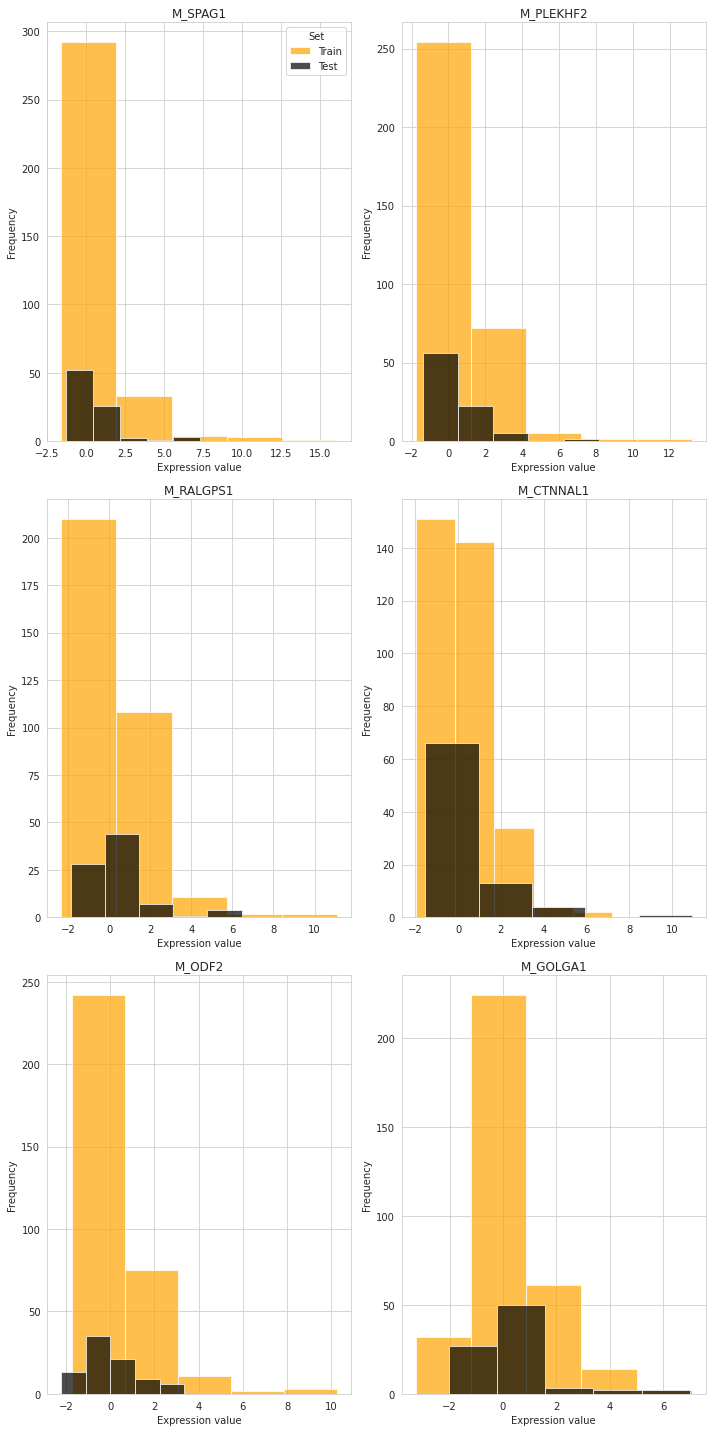

In [36]:
# Set the style of the plot
sns.set_style("whitegrid")

# Determine the number of rows and columns needed based on the number of genes
num_rows = (len(contains) + 1) // 2
num_cols = min(2, len(contains))

# Create a figure with one row for each gene and two columns for the train and test sets
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 20))

# Iterate over the genes of interest and plot the distribution of expression values for the train and test sets
for i, gene in enumerate(contains):
    row = i // num_cols
    col = i % num_cols

    # Plot the distribution of expression values for the train and test sets in the same subplot
    axs[row, col].hist(data_train[gene], color='orange', alpha=0.7, bins=5, label='Train')
    axs[row, col].hist(data_test[gene], color='black', alpha=0.7, bins=5, label='Test')

    # Add labels and title for the subplot
    axs[row, col].set_xlabel('Expression value')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'{gene}')

    # Add a legend for the train and test sets in the top-right subplot
    if i == 0:
        axs[row, col].legend(title='Set', loc='upper right')


# Adjust the spacing between the subplots
plt.tight_layout()

# Display the plot
plt.show()

### Gaussian NB

In [ ]:
# This is a function that takes in the X,y,and total number of features to consider 
# and returns the MCC value using given amount of variables
def MCC_func(X_train,y_true,index):
    data_modeled = model.fit(X_train.iloc[:,0:index+1], y_true)
    #print(X_train.iloc[:,0:2])
    y_pred = data_modeled.predict(X_train.iloc[:,0:index+1])
    MCC = matthews_corrcoef(y_true, y_pred)
    return MCC

In [ ]:
model = GaussianNB()
MCC = []
i = 0
while i<=3500:
    score = MCC_func(X,y,i)
    MCC.append(score)
    i += 1

In [ ]:
index = list(range(0,3501))
plt.plot(index, MCC, '-o')
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('MCC score', fontsize=14)
plt.title('Relation between MCC score and Number of Features')
plt.show()

In [ ]:
MCC_pd = pd.DataFrame(MCC, columns = ['MCC'])
MCC_pd.sort_values(by = ['MCC'], ascending=[False]).iloc[:10,:]

Therefore, we conclude that the optimal MCC was reached with 1535 features

In [ ]:
MCC_pd.iloc[1000:1001]

In [ ]:
def accuracy_func (X_train,y_true,index):
    data_modeled = model.fit(X_train.iloc[:,0:index+1], y_true)
    y_pred = data_modeled.predict(X_train.iloc[:,0:index+1])
    accur = metrics.accuracy_score(y_true, y_pred)
    return accur

In [ ]:
model = GaussianNB()
accuracy = []
i = 0
while i<= 3500:
    score = accuracy_func(X,y,i)
    accuracy.append(score)
    i += 1

In [ ]:
index = list(range(0,3501))
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(index, accuracy, '-o', markersize=5)
plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Relation between Accuracy score and Number of Features')
plt.show()

In [ ]:
accur_pd = pd.DataFrame(accuracy, columns = ['Accuracy'])
accur_pd.sort_values(by = ['Accuracy'], ascending=[False]).iloc[:10,:]

In [ ]:
index = list(range(0,3501))
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(index, accuracy, '-o', markersize=1)
plt.plot(index, MCC, '-o', markersize=1)

plt.text(index[-1], accuracy[-1], 'Accuracy', ha='right', va='bottom', fontsize=18, color='blue')
plt.text(index[-1], MCC[-1], 'MCC', ha='right', va='bottom', fontsize=18, color='orange')

plt.xlabel('Number of Features', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Relation between Scores and Number of Features')
plt.show()

In [48]:
y_pred_best = cross_val_predict(gnb, X.iloc[:,:1535], y, cv=5)

In [ ]:
conf_matrix = confusion_matrix(y, y_pred_best, labels=[1.0, 2.0]) 
fig, ax = plt.subplots(figsize=(5.5, 5.5), dpi=100, facecolor='w', edgecolor='k', constrained_layout=True, subplot_kw=dict(aspect='equal'))
class_names = ['N1','N0']
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names, ax=ax)
ax.set_xlabel('Predictions', fontsize=14)
ax.set_ylabel('Actuals', fontsize=14)
ax.set_title('Confusion Matrix CV - Bayessian', fontsize=14)
plt.show()

In [ ]:
y_pred_test = cross_val_predict(gnb, data_test.iloc[:,:1535], data_test['PATH_N_STAGE'], cv=5)

In [ ]:
conf_matrix = confusion_matrix(data_test['PATH_N_STAGE'], y_pred_test, labels=[1.0, 2.0]) 
fig, ax = plt.subplots(figsize=(5.5, 5.5), dpi=100, facecolor='w', edgecolor='k', constrained_layout=True, subplot_kw=dict(aspect='equal'))
class_names = ['N1','N0']
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names, ax=ax)
ax.set_xlabel('Predictions', fontsize=14)
ax.set_ylabel('Actuals', fontsize=14)
ax.set_title('Confusion Matrix test - Bayessian', fontsize=14)
plt.show()

[3. 2. 1.]
[0.         0.30909091 1.        ]


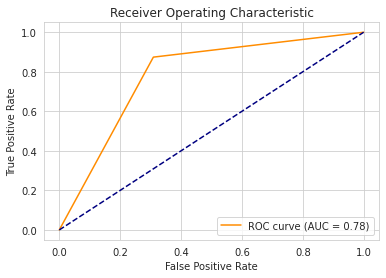

In [51]:
fpr, tpr, thresholds = roc_curve(np.array(y), y_pred_best, pos_label=2.0, drop_intermediate = False)
print(thresholds)
roc_auc = auc(fpr, tpr)
print(fpr)
# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Neural Network

In [41]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model architecture
model = Sequential()
model.add(Dense(1000, input_dim=data_train.iloc[:,:1535].shape[1], activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [82]:
npX = data_train.iloc[:,:1535].to_numpy()
npX.shape

(333, 1535)

In [86]:
npy = (y-1).to_numpy(dtype = int)
npy.shape

(333,)

In [87]:
model.fit(npX,npy,epochs = 20)

Epoch 1/20
11/11 [==============================] - 1s 20ms/step - loss: 0.6787 - accuracy: 0.8498
Epoch 2/20
11/11 [==============================] - 0s 20ms/step - loss: 0.6761 - accuracy: 0.8589
Epoch 3/20
11/11 [==============================] - 0s 19ms/step - loss: 0.6677 - accuracy: 0.8589
Epoch 4/20
11/11 [==============================] - 0s 20ms/step - loss: 0.6593 - accuracy: 0.8559
Epoch 5/20
11/11 [==============================] - 0s 21ms/step - loss: 0.6598 - accuracy: 0.8559
Epoch 6/20
11/11 [==============================] - 0s 20ms/step - loss: 0.6559 - accuracy: 0.8559
Epoch 7/20
11/11 [==============================] - 0s 19ms/step - loss: 0.6524 - accuracy: 0.8559
Epoch 8/20
11/11 [==============================] - 0s 21ms/step - loss: 0.6490 - accuracy: 0.8559
Epoch 9/20
11/11 [==============================] - 0s 20ms/step - loss: 0.6458 - accuracy: 0.8559
Epoch 10/20
11/11 [==============================] - 0s 20ms/step - loss: 0.6424 - accuracy: 0.8559
Epoch 11/

In [88]:
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef

# Get predicted probabilities and convert to binary predictions
y_pred = model.predict(data_train.iloc[:,:1535])
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred]

# Calculate accuracy, F1 score, and MCC
accuracy = accuracy_score(npy, y_pred_binary)
f1 = f1_score(npy, y_pred_binary, average='weighted')
mcc = matthews_corrcoef(npy, y_pred_binary)

# Print the performance metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"F1 score: {f1:.3f}")
print(f"MCC: {mcc:.3f}")

11/11 [==============================] - 0s 4ms/step
Accuracy: 0.856
F1 score: 0.806
MCC: 0.329


In [78]:
y-1.0

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
328    1.0
329    1.0
330    1.0
331    0.0
332    1.0
Name: PATH_N_STAGE, Length: 333, dtype: float64

In [76]:
y_pred

array([[5.00000000e-01],
       [4.02304232e-01],
       [3.80935252e-01],
       [6.34516627e-02],
       [4.56880867e-01],
       [2.22341716e-01],
       [3.09621304e-01],
       [4.84332055e-01],
       [5.00000000e-01],
       [4.69306827e-01],
       [5.00000000e-01],
       [5.00000000e-01],
       [5.00000000e-01],
       [5.00000000e-01],
       [1.82100371e-01],
       [5.00000000e-01],
       [5.00000000e-01],
       [4.16218668e-01],
       [3.78897727e-01],
       [5.00000000e-01],
       [5.00000000e-01],
       [3.84288758e-01],
       [3.12742680e-01],
       [5.00000000e-01],
       [3.05446059e-01],
       [4.83413190e-01],
       [5.00000000e-01],
       [5.00000000e-01],
       [5.00000000e-01],
       [3.84792119e-01],
       [3.30609679e-01],
       [1.64417326e-01],
       [3.11669379e-01],
       [5.00000000e-01],
       [2.82242209e-01],
       [4.74768072e-01],
       [5.00000000e-01],
       [4.55737561e-01],
       [2.88859725e-01],
       [2.60960817e-01],


In [ ]:
validation_dataset

In [ ]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(random_state=1, max_iter=300)
parameters = {'alpha':[0.0001, 0.01, 0.1, 1.0, 10], 'learning_rate_init':[0.0001, 0.001, 0.01, 0.1, 1.0]}
clf = GridSearchCV(nn, parameters, scoring='f1_macro')
clf.fit(X, y)
for key in clf.cv_results_.keys():
    print(key)
    print(clf.cv_results_.get(key))

/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: Convergence

mean_fit_time
[ 5.11306949  1.40072913  1.11654902  1.40136757  0.69932675  5.15542297
  1.40154686  0.92032237  0.73872213  0.53965001  7.6012485  11.28320818
  2.35055118  0.54727259  0.62120175 12.93152819  7.99273691  3.25039721
  0.54450107  0.626788   13.23062339  4.75287337  2.27064071  2.54747734
  1.53728786]
std_fit_time
[0.13964394 0.11819441 0.05757775 0.36444645 0.2240504  0.18613413
 0.0808827  0.05863988 0.16484267 0.01821361 0.48327994 0.23296349
 2.838552   0.02999851 0.00784725 0.17866666 0.18942736 0.69497983
 0.03822484 0.02175261 0.47329305 1.06987605 0.34558285 0.74719363
 1.55804758]
mean_score_time
[0.04928031 0.04925356 0.04848037 0.04869704 0.04917278 0.04862022
 0.04907002 0.04893317 0.0546793  0.04865851 0.05082531 0.05305986
 0.05151606 0.05126362 0.05726113 0.05327315 0.05275283 0.0504909
 0.0501833  0.05320292 0.05157208 0.05127239 0.05130944 0.05185666
 0.04881306]
std_score_time
[0.00056755 0.00146345 0.00046253 0.00030187 0.00115932 0.00066058
 0.00094